#Line Search - Rosenbrock function

In [1]:
def f(alpha,x,d):
  
  return (1-(x[0]-alpha*d[0]))**2 + 5*((x[1]-alpha*d[1])-(x[0]-alpha*d[0])**2)**2
 
# derivative of the objective function 

def grad_alpha(f,alpha,x,d):
  h = 0.00001
  return (f(alpha+h,x,d)-f(alpha,x,d))/h

def bracket_minimum(alpha,x,d,s,k):

  a, fa = alpha,  f(alpha,x,d)
  b, fb = a+s , f(a+s,x,d)

  if fb > fa:
    a,b = b,a 
    fa, fb = fb,fb
    s = -s

  while True:
    c, fc = b+s, f(b+s,x,d)
    if fc > fb:
      if a < c:
        return [a,c]
      else:
        return [c,a]
    a,fa,b,fb = b,fb,c,fc
    s*=k

def bisection_root_finding(a,b,x,d,eps):

  if a > b : 
    a,b = b,a 
  fa, fb = grad_alpha(f,a,x,d), grad_alpha(f,b,x,d)
  if fa == 0:
    b = a
    return (a)

  if fb == 0:
    a = b
    return (b)
  iter = 0
 
  while abs(b - a) > eps:
    iter +=1
    c = (a+b)/2
    y = grad_alpha(f,c,x,d)

    if y == 0:
      a,b = c, c
      break

    if np.sign(y)  < 0  :
      a = c
    else:
      b = c

  return (a+b)/2

In [2]:
def line_search(alpha,x,d):
  
  a,b = bracket_minimum(alpha,x,d,s=0.01,k=2.0)
  alpha = bisection_root_finding(a,b,x,d,eps=1e-5)
  return alpha

#DFP Algorithm
(Davidon-Fletcher-Powell Method)

DFP Algorithm

1. Set $k:=0$; select $x^{(0)}$ and a real symmetric positive definite $Q_0$.
2. if $g{(k)} =0$, stop; else $d{(k)}= -Q_k g^{(k)}$
3. Compute:
\begin{align}
  \alpha_k = \text{arg min}_{\alpha \geq 0} f(x^{(k)} + \alpha d^{(k)}),
\end{align}

\begin{align}
  x^{(k+1)} = x^{(k)} + \alpha_k d^{(k)}.
\end{align}
4. Compute:
\begin{align}
  &\triangle x^{(k)} = \alpha_k d^{(k)},\\
  &\triangle g^{(k)} = g^{(k+1)} - g^{(k)},\\
  & Q_{k+1} = Q_k + \frac{\triangle x^{(k)} \triangle x^{(k)T}}{\triangle x^{(k)T} \triangle g^{(k)} } - \frac{[Q_k \triangle g^{(k)}][Q_k \triangle g^{(k)T}]}{\triangle g^{(k)T} Q_k \triangle g^{(k)}}
\end{align}
5. Set $ k:= k+1$; go to step 2.

In [3]:
# Rosenbrock's Banana Function
def fun(x,a):
  pow = a
  if pow == 0:
    return (1 - x[0])**2 + 5*(x[1] - x[0]**2)**2
   
  else:
    h = 0.00001
    x1 = np.array([x[0]+h,x[1]])
    x2 = np.array([x[0],x[1]+h])
    # The gradient Vector
    g = np.array([(fun(x1,0)-fun(x,0))/h,(fun(x2,0)-fun(x,0))/h])
    return g

In [9]:
def dfp(x,alpha,eps):

  # Initialize list to hold the values for successive progression of x and f(x)
  arr_x = []; arr_f = []
  arr_x.append(x)

  # Initialize the first instance of the approximate positive definite symmetric matrix - Q
  m = len(x)
  Q = np.identity(m)
  f, g = fun(x,0), fun(x,1)
  
  # Initialize iteration counter
  i = 0

  while abs(fun(x,0)) > eps:
    
    # calculating the direction of the descent
    d = np.dot(Q,g.T)
    d = d/ np.linalg.norm(d)
    
    # updating the iteration counter
    i +=1
    
    alpha = line_search(alpha,x,d)
    
    # Updating the value of next design point x
    x1 = x - alpha*d
    # Calculating the gradient w.r.t new design point
    g1 = fun(x1,1)

    # delta and gamma : the net change in design point and radient respectively
    delta = np.array([alpha*d])
    gamma = np.array([g1-g])
    
    # DFP Update of Q
    Q = Q - np.dot(np.dot(Q,gamma.T),np.dot(gamma,Q))/np.dot(gamma,np.dot(Q,gamma.T)) + np.dot(delta,delta.T)/np.dot(gamma,delta.T)
    x = x1
    g = g1
    f = fun(x,0)
    #appending values of x and f(x) to the lists
    arr_x.append(x)
    arr_f.append(f)
    #print("iter:",i,"f:",arr_f[-1])

  return x,arr_x,arr_f,i

In [10]:
import numpy as np
x = np.array([1,2])
alpha = 4
eps = 1e-5
x,arr_x,arr_f_dfp,i = dfp(x,alpha,eps)
print("The minimum point of the Rosenbrock function:",x)
print("The number of iteration taken by the DFP method to reach the minimum function value:",i)

The minimum point of the Rosenbrock function: [0.99784177 0.99526017]
The number of iteration taken by the DFP method to reach the minimum function value: 23


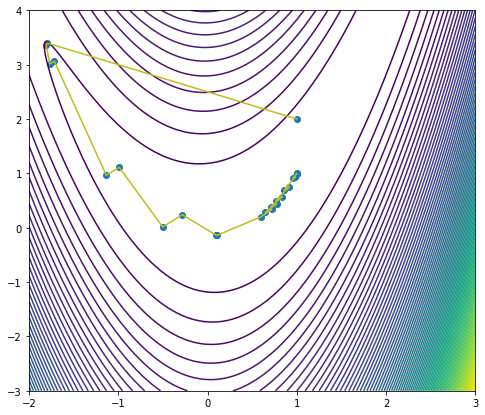

In [12]:
# Plot of the successive points of 'x' as we progress in the direction of the steepest descent.
import pandas as pd
import matplotlib.pyplot as plt

x1 = np.linspace(-2,3,500)
x2 = np.linspace(-3,4,500)
arr_x = pd.DataFrame(arr_x)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = (1 - X)**2 + 5*(Y - X**2)**2

a,b  = arr_x[0],arr_x[1]
plt.figure(figsize=(8,7))
plt.scatter(a,b)
plt.contour(X,Y,Z,90)
plt.plot(a,b,color='#bcbd22')
plt.show()

# BFGS Method
(Broyden, Fletcher, Goldfarb and Shanno algorithm)
Similar to DFP method, the change being the change in the update of Q.

BFGS Algorithm

1. Set $k:=0$; select $x^{(0)}$ and a real symmetric positive definite $Q_0$.
2. if $g{(k)} =0$, stop; else $d{(k)}= -Q_k g^{(k)}$
3. Compute:
\begin{align}
  \alpha_k = \text{arg min}_{\alpha \geq 0} f(x^{(k)} + \alpha d^{(k)}),
\end{align}

\begin{align}
  x^{(k+1)} = x^{(k)} + \alpha_k d^{(k)}.
\end{align}
4. Compute:
\begin{align}
  &\triangle x^{(k)} = \alpha_k d^{(k)},\\
  &\triangle g^{(k)} = g^{(k+1)} - g^{(k)},\\
  & Q_{k+1} = Q_k + (1+ \frac{\triangle g^{(k)T} Q_k \triangle g^{(k)}}{\triangle g^{(k)T} \triangle x^{(k)}}) \frac{\triangle x^{(k)} \triangle x^{(k)T}}{\triangle x^{(k)T} \triangle g^{(k)}} - \frac{Q_k \triangle g^{(k)} \triangle x^{(k)T} + (Q_k \triangle g^{(k)} \triangle x^{(k)T})^T}{\triangle g^{(k)T} \triangle x^{(k)}}
\end{align}
5. Set $ k:= k+1$; go to step 2.

In [13]:
def bfgs(x,alpha,eps):

  # Initialize list to hold the values for successive progression of x and f(x)
  arr_x = []; arr_f = []
  arr_x.append(x)

  # Initialize the first instance of the approximate positive definite symmetric matrix - Q
  m = len(x)
  Q = np.identity(m)
  f, g = fun(x,0), fun(x,1)
  
  # Initialize iteration counter
  i = 0

  while abs(fun(x,0)) > eps:
  
    # calculating the direction of the descent
    d = np.dot(Q,g.T)
    d = d/ np.linalg.norm(d)
    
    # updating the iteration counter
    i +=1
    
    alpha = line_search(alpha,x,d)
    
    # Updating the value of next design point x
    x1 = x - alpha*d
    # Calculating the gradient w.r.t new design point
    g1 = fun(x1,1)

    # delta and gamma : the net change in design point gradient respectively.
    phi = np.array([alpha*d])
    rho = np.array([g1-g])
    
    # BFGS Update of Q
   
    v1 = (np.dot(phi.T,rho)*Q + Q*np.dot(rho,phi.T))/ np.dot(phi,rho.T) 
    v2 = 1 + np.dot(rho,np.dot(Q,rho.T))/np.dot(phi.T,rho)
    v3 = np.dot(phi,phi.T)/np.dot(phi,rho.T)
    Q = Q - v1 + v2 * v3
    x = x1
    g = g1
    f = fun(x,0)
    #appending values of x and f(x) to the lists
    arr_x.append(x)
    arr_f.append(f)
    #print("iter:",i,"f:",arr_f[-1])

  return x,arr_x,arr_f,i

In [14]:
import numpy as np
x = np.array([1,2])
alpha = 4
eps = 1e-5
x,arr_x,arr_f_bfgs,i = bfgs(x,alpha,eps)
print("The minimum point of the Rosenbrock function:",x)
print("The number of iteration taken by the DFP method to reach the minimum function value:",i)

The minimum point of the Rosenbrock function: [0.9990833  0.99803185]
The number of iteration taken by the DFP method to reach the minimum function value: 17


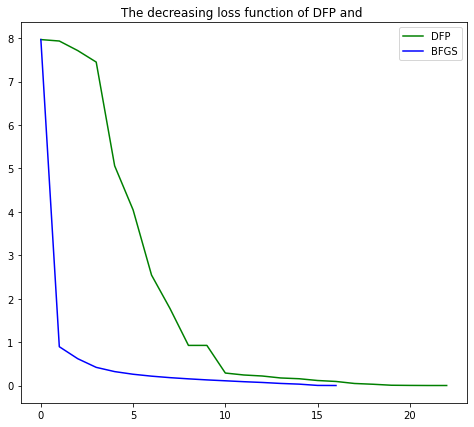

In [15]:
f = len(arr_f_dfp)
b = len(arr_f_bfgs)
x1 = range(0,f)
x2 = range(0,b)
plt.figure(figsize=(8,7))
plt.plot(x1,arr_f_dfp,"r",color="green")
plt.plot(x2,arr_f_bfgs,"r",color="blue")
plt.title("The decreasing loss function of DFP and ")
plt.legend(['DFP','BFGS'])
plt.show()

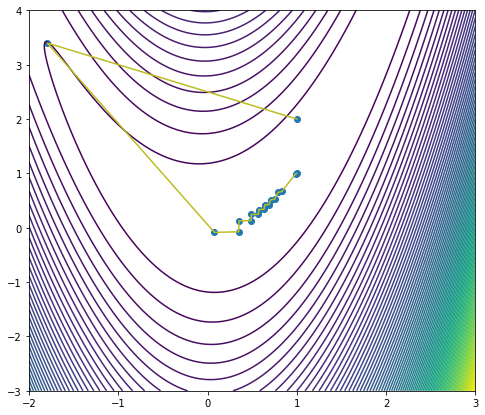

In [16]:
# Plot of the successive points of 'x' as we progress in the direction of the steepest descent.
import pandas as pd
x1 = np.linspace(-2,3,500)
x2 = np.linspace(-3,4,500)
arr_x = pd.DataFrame(arr_x)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = (1 - X)**2 + 5*(Y - X**2)**2

a,b  = arr_x[0],arr_x[1]
plt.figure(figsize=(8,7))
plt.scatter(a,b)
plt.contour(X,Y,Z,90)
plt.plot(a,b,color='#bcbd22')
plt.show()